# **EXPLORATORY DATA ANALYSIS**
A notebook to explore characteristics of the data

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Disable warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import copy
import pandas as pd
import numpy as np
import os
PRJ_ROOT_DIR = os.path.dirname(os.path.abspath(''))

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

In [2]:
# Where to save the figures
NOTE_ROOT_DIR = os.path.abspath('')
CHAPTER_ID = "02_exploratory_data_analysis-Dat"
IMAGES_PATH = os.path.join(NOTE_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
## **1 - Load the Data**
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## **1 - Load the Data**

In [63]:
# Load player data with position
df_player = pd.read_csv(os.path.join(PRJ_ROOT_DIR, "data", "tabular", "exploratory", "players_with_position.csv"))
df_player.head()

,defence/clean_sheets,defence/goals_conceded,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/interceptions,defence/clearances,defence/headed_clearance,defence/clearances_off_line,...,defence/recoveries,defence/duels_won,defence/duels_lost,teamplay/passes,teamplay/crosses,teamplay/accurate_long_balls,id,name,season,position
0,0.0,0.0,12.0,50.0,0.0,6.0,8.0,5.0,4.0,0.0,...,58.0,73.0,71.0,273.0,11.0,5.0,216646.0,Yoane Wissa,2021/22,fw
1,0.0,0.0,17.0,0.0,0.0,5.0,6.0,13.0,8.0,0.0,...,0.0,0.0,0.0,426.0,4.0,0.0,120202.0,Wout Weghorst,2021/22,fw
2,5.0,22.0,28.0,68.0,0.0,3.0,18.0,78.0,46.0,0.0,...,78.0,92.0,38.0,1151.0,1.0,80.0,90152.0,Raphaël Varane,2021/22,df
3,0.0,0.0,5.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,96.0,7.0,0.0,439509.0,Christos Tzolis,2021/22,mf
4,0.0,0.0,3.0,67.0,0.0,0.0,2.0,3.0,0.0,0.0,...,13.0,9.0,28.0,115.0,7.0,3.0,130036.0,Ozan Tufan,2021/22,mf


In [64]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
df_player['position'] = LabelEncoder().fit_transform(df_player['position'])
df_player = df_player[df_player["season"] != "2018/19"]
df_player.head()

,defence/clean_sheets,defence/goals_conceded,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/interceptions,defence/clearances,defence/headed_clearance,defence/clearances_off_line,...,defence/recoveries,defence/duels_won,defence/duels_lost,teamplay/passes,teamplay/crosses,teamplay/accurate_long_balls,id,name,season,position
0,0.0,0.0,12.0,50.0,0.0,6.0,8.0,5.0,4.0,0.0,...,58.0,73.0,71.0,273.0,11.0,5.0,216646.0,Yoane Wissa,2021/22,1
1,0.0,0.0,17.0,0.0,0.0,5.0,6.0,13.0,8.0,0.0,...,0.0,0.0,0.0,426.0,4.0,0.0,120202.0,Wout Weghorst,2021/22,1
2,5.0,22.0,28.0,68.0,0.0,3.0,18.0,78.0,46.0,0.0,...,78.0,92.0,38.0,1151.0,1.0,80.0,90152.0,Raphaël Varane,2021/22,0
3,0.0,0.0,5.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,96.0,7.0,0.0,439509.0,Christos Tzolis,2021/22,3
4,0.0,0.0,3.0,67.0,0.0,0.0,2.0,3.0,0.0,0.0,...,13.0,9.0,28.0,115.0,7.0,3.0,130036.0,Ozan Tufan,2021/22,3


In [65]:
attributes = list(set(list(attr.split('/')[0] for attr in df_player.columns if len(attr.split('/'))>1)))
attributes

['attack', 'discipline', 'teamplay', 'goalkeeping', 'defence']

**NOTE:** The match data contains player IDs, which is not statistical. Therefore, the notebook will mostly exploit the player data.

## **2 - EPL Player**

### **2.1 - Multivariate Analysis**

Saving figure player_performance_correlation


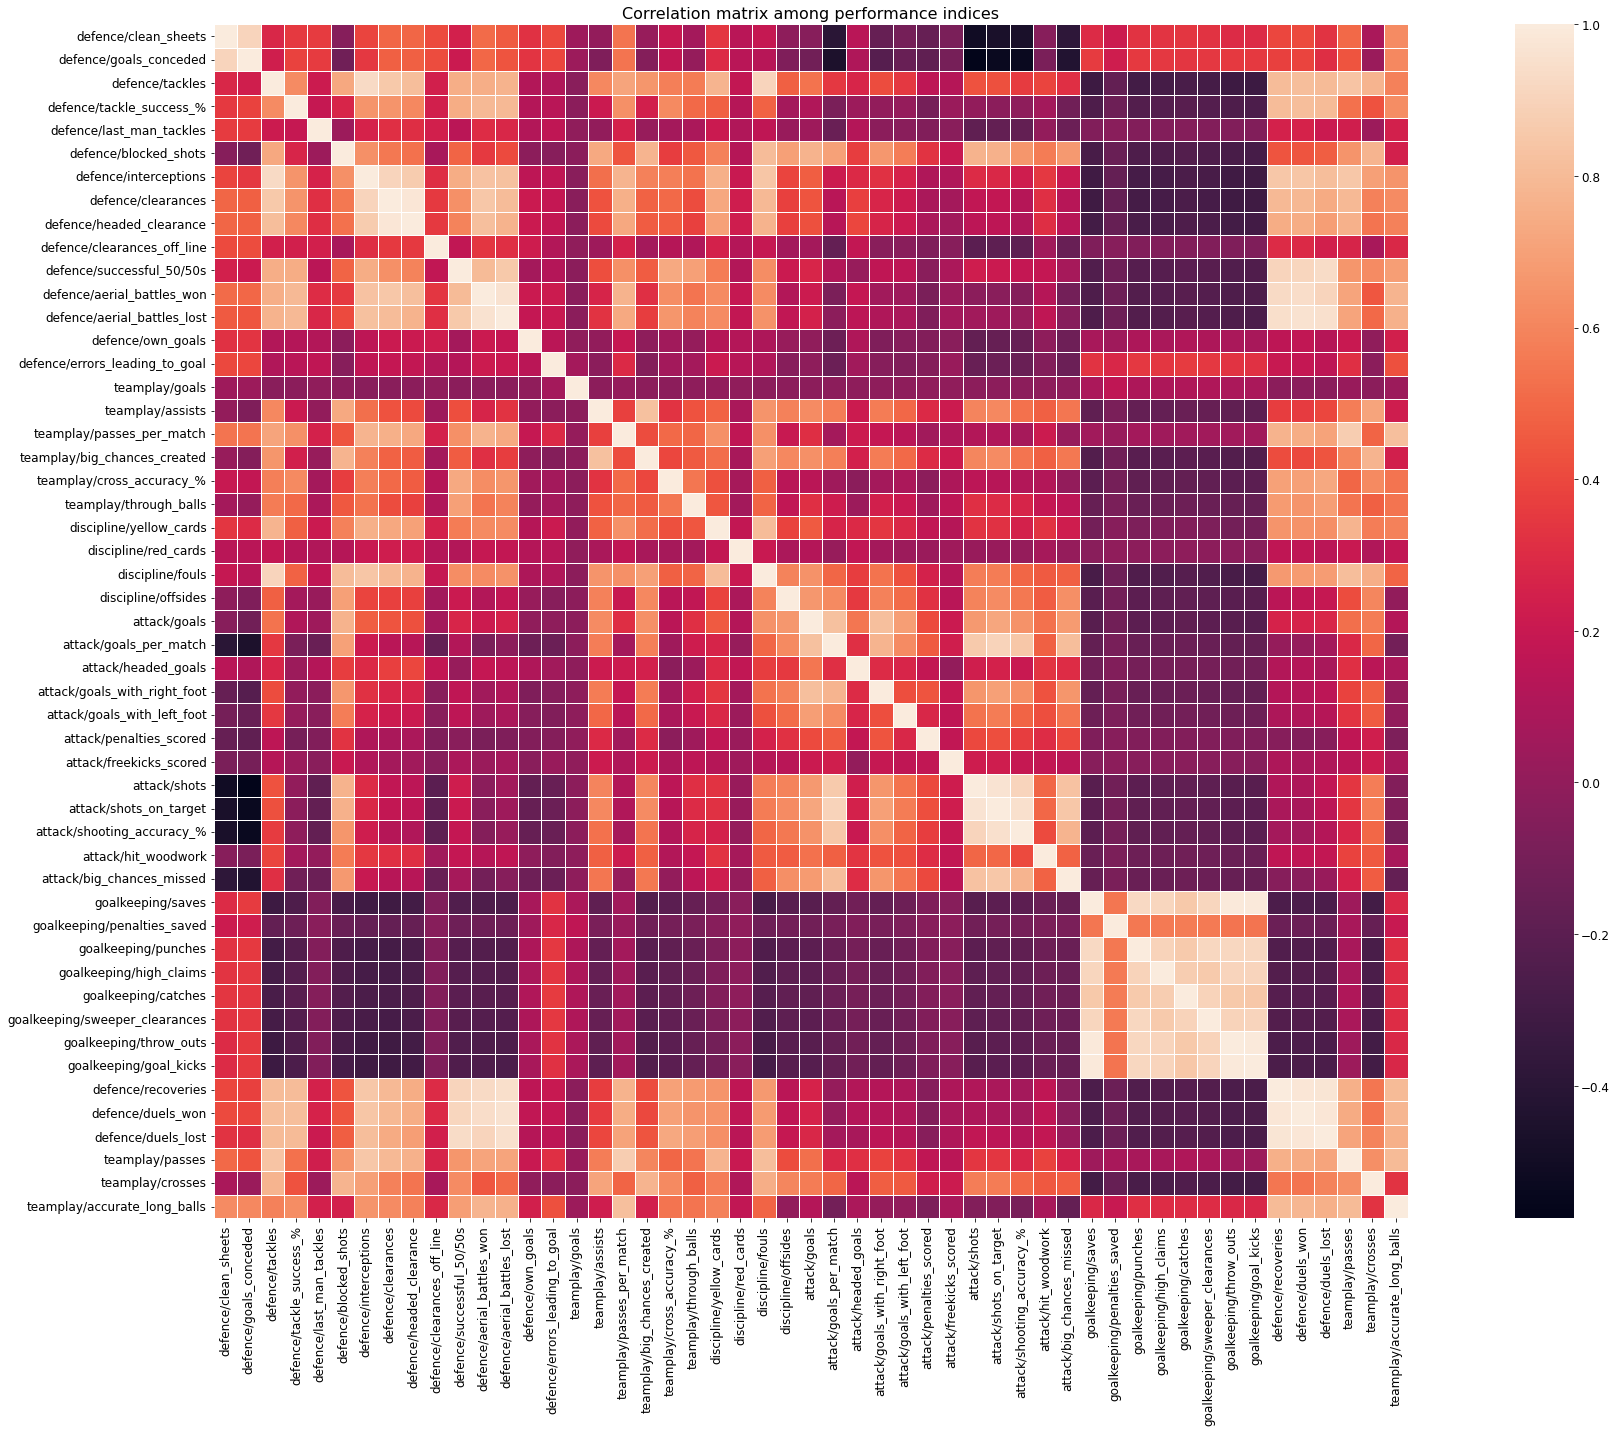

In [66]:
# Correlation among performance indices of players
corr_mat = df_player.iloc[:, :-4].corr(method="spearman")

plt.figure(figsize=(30, 20))
sns.heatmap(corr_mat, square=True, annot=False, linewidths=.5)
plt.title("Correlation matrix among performance indices", size=16)
plt.tight_layout()
save_fig("player_performance_correlation")

In [68]:
# Get the most correlated pairs of indices
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

tri_corr_mat = corr_mat.unstack()
cells_to_drop = get_redundant_pairs(df_player.iloc[:, :-4])
tri_corr_mat = tri_corr_mat.drop(labels=cells_to_drop).sort_values(ascending=False)

print("Top 10 positive correlated feature pairs:\n" + str(tri_corr_mat[0:10]))
print("\n----------------------------------------------------------------")
print("\nTop 10 negative correlated feature pairs:\n"+ str(tri_corr_mat[-10:]))
print("\n----------------------------------------------------------------")
print("\nTop 10 feature pairs:\n" + str(tri_corr_mat.abs().sort_values(ascending=False)[:20]))

Top 10 positive correlated feature pairs:
goalkeeping/saves            goalkeeping/goal_kicks         0.992027
goalkeeping/throw_outs       goalkeeping/goal_kicks         0.991795
goalkeeping/saves            goalkeeping/throw_outs         0.991635
defence/recoveries           defence/duels_won              0.980017
defence/duels_won            defence/duels_lost             0.979367
defence/clearances           defence/headed_clearance       0.978517
defence/recoveries           defence/duels_lost             0.970690
attack/shots                 attack/shots_on_target         0.965532
defence/aerial_battles_lost  defence/duels_won              0.960686
defence/aerial_battles_won   defence/aerial_battles_lost    0.959319
dtype: float64

----------------------------------------------------------------

Top 10 negative correlated feature pairs:
defence/clean_sheets    attack/big_chances_missed    -0.378891
                        attack/goals_per_match       -0.400780
defence/goals_conc

In [69]:
# Percentage of feature pairs having a strong correlation 
tri_corr_mat_pos = tri_corr_mat.abs().sort_values(ascending=False)
print(f'Number of features have correlation > 0.80: {len(tri_corr_mat_pos[tri_corr_mat_pos > 0.80])}')
print(f'Number of features have correlation > 0.85: {len(tri_corr_mat_pos[tri_corr_mat_pos > 0.85])}')
print(f'Number of features have correlation > 0.90: {len(tri_corr_mat_pos[tri_corr_mat_pos > 0.90])}')

Number of features have correlation > 0.80: 79
Number of features have correlation > 0.85: 50
Number of features have correlation > 0.90: 34


## **3 - Dimension Reduction**

### **3.1 - High correlation features remove**

In [70]:
drop_attributes = dict()
for attr in attributes:    
    drop_attributes[attr] = list()
    
for compare_attr, score in tri_corr_mat.to_dict().items():
    if score > 0.80:
        if compare_attr[0].split('/')[0] == compare_attr[1].split('/')[0]: 
            drop_attr = compare_attr[1]
            drop_attributes[drop_attr.split('/')[0]].append(drop_attr)
count = 0
for s in drop_attributes:
    print(s)
    count += len(drop_attributes[s])
count

attack
discipline
teamplay
goalkeeping
defence


72

In [71]:
drop_columns = []
for s in drop_attributes:
    drop_columns += drop_attributes[s]
len(drop_columns)

72

Saving figure player_performance_after_remove_high_correlation


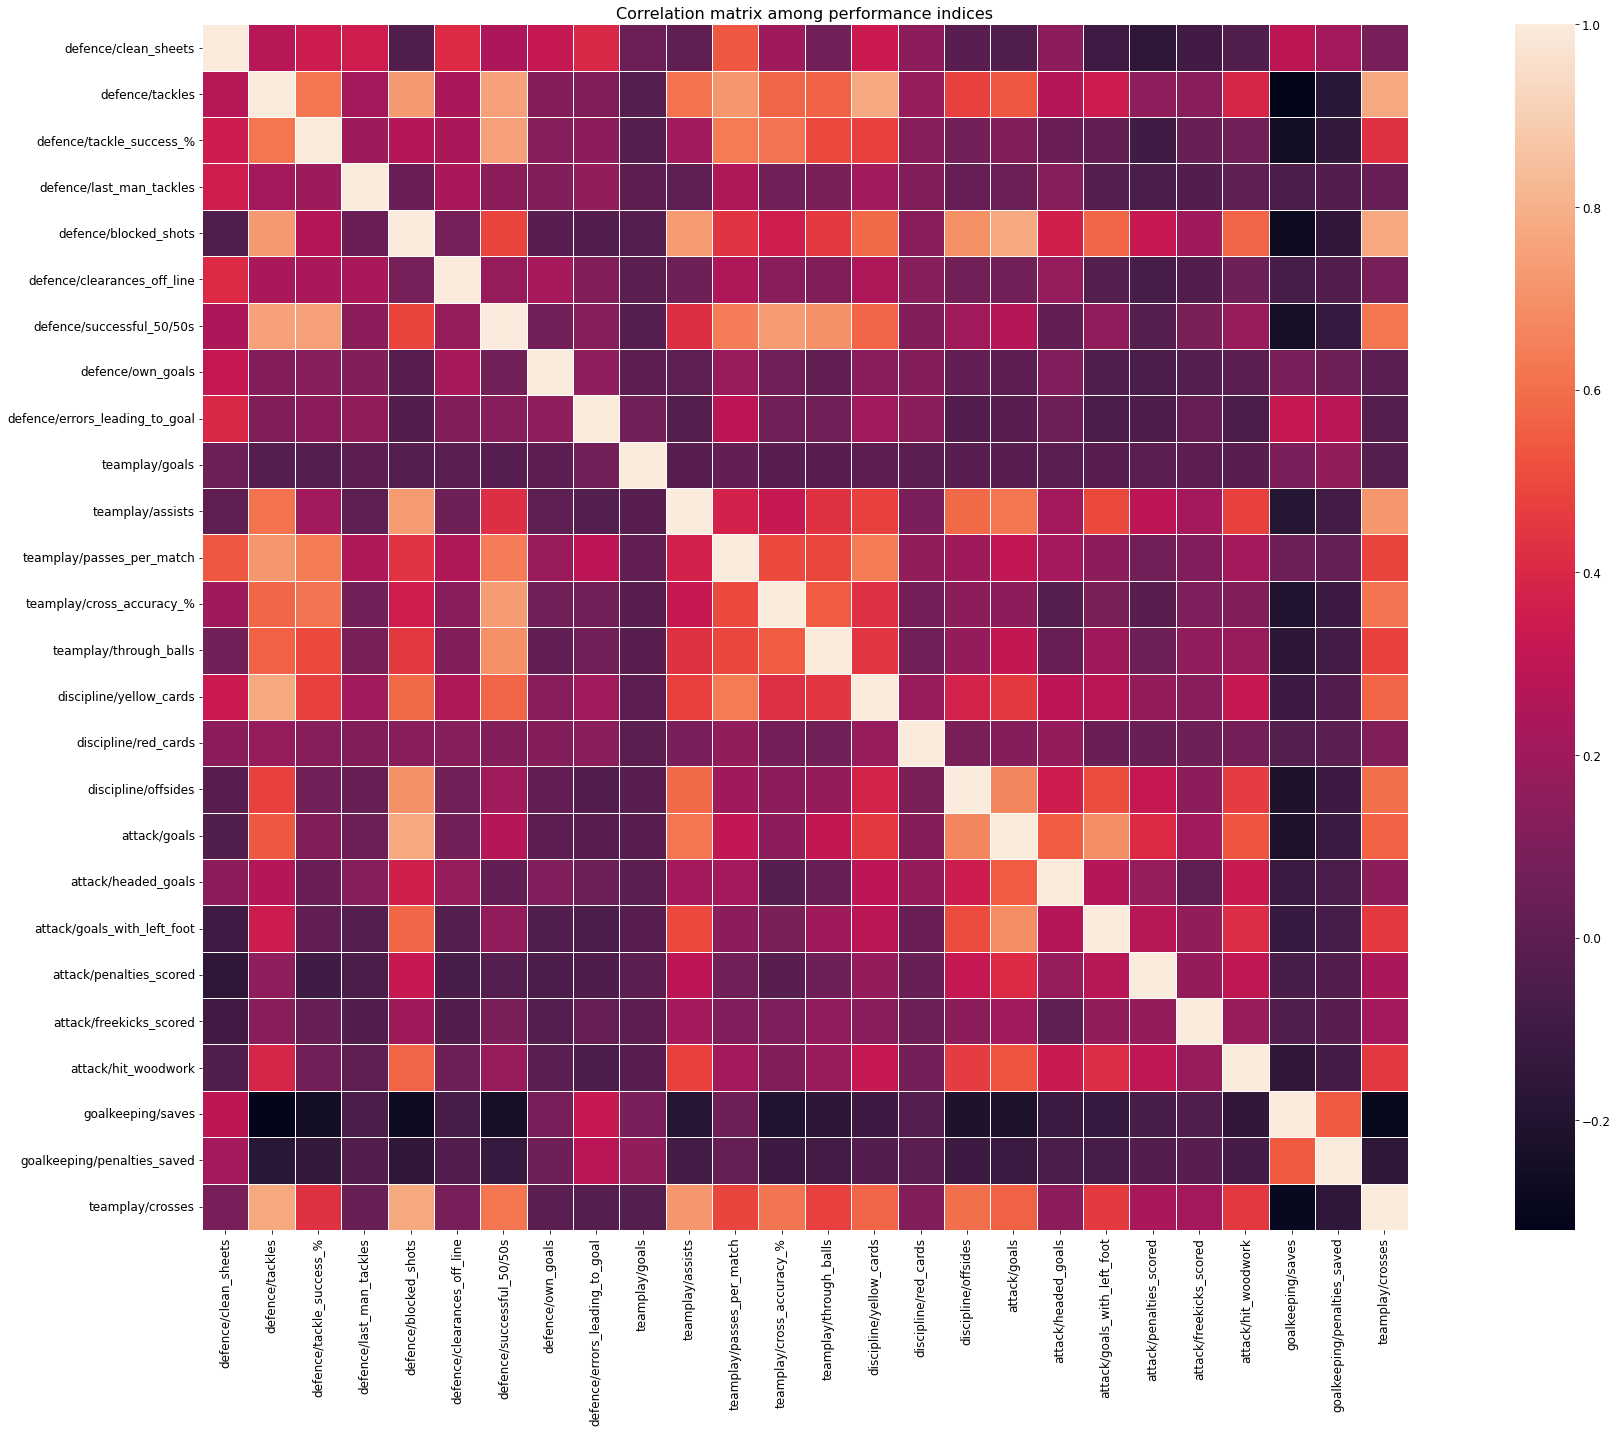

In [73]:
df_player_corr_rm = df_player.drop(columns=list(set(drop_columns)))
df_corr_rm_mat = df_player_corr_rm.iloc[:,:-4].corr(method="spearman")
plt.figure(figsize=(30, 20))
sns.heatmap(df_corr_rm_mat, square=True, annot=False, linewidths=.5)
plt.title("Correlation matrix among performance indices", size=16)
plt.tight_layout()
save_fig("player_performance_after_remove_high_correlation")

In [75]:
tri_corr_rm_mat = df_corr_rm_mat.unstack()
cells_to_drop_1 = get_redundant_pairs(df_player_corr_rm.iloc[:, :-4])
tri_corr_rm_mat = tri_corr_rm_mat.drop(labels=cells_to_drop_1).sort_values(ascending=False)

print("Top 10 positive correlated feature pairs:\n" + str(tri_corr_rm_mat[0:10]))
print("\n----------------------------------------------------------------")
print("\nTop 10 negative correlated feature pairs:\n"+ str(tri_corr_rm_mat[-10:]))
print("\n----------------------------------------------------------------")
print("\nTop 10 feature pairs:\n" + str(tri_corr_rm_mat.abs().sort_values(ascending=False)[:20]))

Top 10 positive correlated feature pairs:
defence/blocked_shots      teamplay/crosses             0.777639
defence/tackles            teamplay/crosses             0.777384
                           discipline/yellow_cards      0.774289
defence/blocked_shots      attack/goals                 0.770164
defence/tackles            defence/successful_50/50s    0.752179
defence/tackle_success_%   defence/successful_50/50s    0.746862
defence/successful_50/50s  teamplay/cross_accuracy_%    0.732148
defence/blocked_shots      teamplay/assists             0.731685
defence/tackles            defence/blocked_shots        0.726570
                           teamplay/passes_per_match    0.716358
dtype: float64

----------------------------------------------------------------

Top 10 negative correlated feature pairs:
defence/tackles            goalkeeping/penalties_saved   -0.171205
teamplay/assists           goalkeeping/saves             -0.185996
teamplay/cross_accuracy_%  goalkeeping/saves      

In [137]:
df_player_corr_rm.head()

,defence/clean_sheets,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/clearances_off_line,defence/successful_50/50s,defence/own_goals,defence/errors_leading_to_goal,teamplay/goals,...,attack/penalties_scored,attack/freekicks_scored,attack/hit_woodwork,goalkeeping/saves,goalkeeping/penalties_saved,teamplay/crosses,id,name,season,position
0,0.0,12.0,50.0,0.0,6.0,0.0,19.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,216646.0,Yoane Wissa,2021/22,1
1,0.0,17.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,4.0,120202.0,Wout Weghorst,2021/22,1
2,5.0,28.0,68.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,90152.0,Raphaël Varane,2021/22,0
3,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,439509.0,Christos Tzolis,2021/22,3
4,0.0,3.0,67.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,130036.0,Ozan Tufan,2021/22,3


In [203]:
num_attr = len(df_player_corr_rm.iloc[:, :-4].columns)
# fig, axes = plt.subplots(4, 7, figsize=(80, 120), sharey=True)
fig.suptitle('Distribution of attributes after remove high correlation')
df_player_corr_rm[df_player_corr_rm.position==0].iloc[:, :-4].hist(bins=50, figsize=(200, 200))
plt.tight_layout()

### Here we consider two methods to reduce data dimension, first is the PCA, second is the Autoencoder to observe the linearity of data features, since PCA works well for linear data but non-linear data.

## **3.2 - Principal Component Analysis (PCA)**

In [78]:
df_player_defence_with_label = df_player_corr_rm[[col for col in df_player_corr_rm.columns if 'defence' in col]+['position']]
df_player_defence_with_label.head()

,defence/clean_sheets,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/clearances_off_line,defence/successful_50/50s,defence/own_goals,defence/errors_leading_to_goal,position
0,0.0,12.0,50.0,0.0,6.0,0.0,19.0,0.0,0.0,1
1,0.0,17.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1
2,5.0,28.0,68.0,0.0,3.0,0.0,2.0,0.0,0.0,0
3,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3
4,0.0,3.0,67.0,0.0,0.0,0.0,3.0,0.0,0.0,3


In [108]:
# Split train-test data
from sklearn.model_selection import train_test_split
df_train_set, df_test_set = train_test_split(df_player_defence_with_label, test_size=0.1, random_state=42)
df_X_test, df_y_test = df_test_set.iloc[:, :-1], df_test_set["position"]
df_X_train, df_y_train = df_train_set.iloc[:, :-1], df_train_set["position"]
df_X_train.head()

,defence/clean_sheets,defence/tackles,defence/tackle_success_%,defence/last_man_tackles,defence/blocked_shots,defence/clearances_off_line,defence/successful_50/50s,defence/own_goals,defence/errors_leading_to_goal
486,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
730,0.0,28.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0
439,0.0,15.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0
49,1.0,7.0,71.0,0.0,0.0,0.0,5.0,0.0,0.0
618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(df_X_train)
compressed_images = pca.transform(df_X_test)
recovered_images = pca.inverse_transform(compressed_images)

In [86]:
compressed_images.shape

(186, 1)

Saving figure pca_feature_space


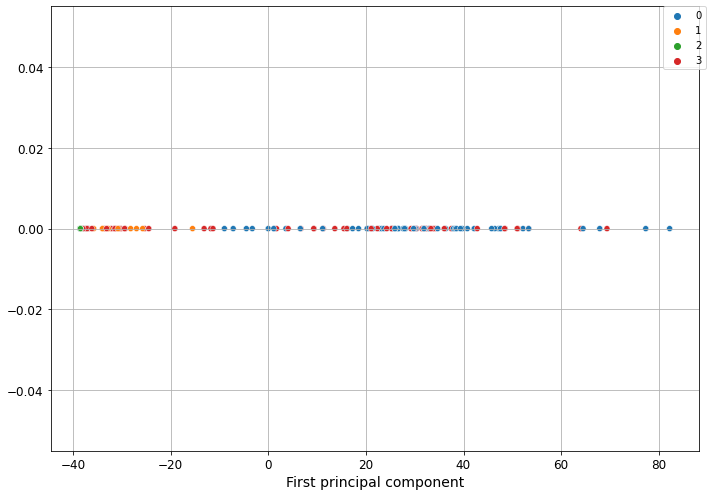

In [88]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x=compressed_images[:, 0],
                y=np.zeros(len(compressed_images)),
                hue=df_y_test, palette='tab10')

plt.xlabel("First principal component")

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.grid()
plt.tight_layout()
save_fig("pca_feature_space")

## **3.3 - Auto Encoder (AE)**

In [95]:
# df_player_defence_normalize = 
import torch
import torch.nn as nn
from torchsummary import summary
from math import sqrt

In [197]:
class AutoEncoder(nn.Module):
    def __init__(self, input_dim, latent_vec_dim):
        super(AutoEncoder, self).__init__()
        self.enc_layer_1 = nn.Linear(input_dim, int(sqrt(input_dim)))
#         self.enc_layer_1 = nn.Linear(input_dim, latent_vec_dim)
        self.enc_layer_2 = nn.Linear(int(sqrt(input_dim)), latent_vec_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dec_layer_1 = nn.Linear(latent_vec_dim, int(sqrt(input_dim)))
#         self.dec_layer_1 = nn.Linear(latent_vec_dim, input_dim)
        self.dec_layer_2 = nn.Linear(int(sqrt(input_dim)), input_dim)
    def encoder(self, x):
        x = self.enc_layer_1(x)
        x = self.relu(x)
        x = self.enc_layer_2(x)
        x = self.sigmoid(x)
        return x
    def decoder(self, x):
        x = self.dec_layer_1(x)
        x = self.relu(x)
        x = self.dec_layer_2(x)
        x = self.sigmoid(x)
        return x
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [193]:
from sklearn.preprocessing import MinMaxScaler
df_player_defence_with_label = df_player_corr_rm[[col for col in df_player_corr_rm.iloc[:,:-4].columns]+['position']]
df_train_set, df_test_set = train_test_split(df_player_defence_with_label, test_size=0.1, random_state=42)
df_X_test, df_y_test = df_test_set.iloc[:, :-1], df_test_set["position"]
df_X_train, df_y_train = df_train_set.iloc[:, :-1], df_train_set["position"]
df_X_train_normalized = MinMaxScaler().fit_transform(df_X_train)
df_X_train_normalized[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00411523, 0.        , 0.        , 0.        ,
       0.        , 0.12759946, 0.        , 0.01086957, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00178891])

In [198]:
input_dim = len(df_player_defence_with_label.columns)
latent_vec_dim = 5
model = AutoEncoder(input_dim, latent_vec_dim)
summary(model, (1,input_dim))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1, 5]                140
├─ReLU: 1-2                              [-1, 1, 5]                --
├─Linear: 1-3                            [-1, 1, 5]                30
├─Sigmoid: 1-4                           [-1, 1, 5]                --
├─Linear: 1-5                            [-1, 1, 5]                30
├─ReLU: 1-6                              [-1, 1, 5]                --
├─Linear: 1-7                            [-1, 1, 27]               162
├─Sigmoid: 1-8                           [-1, 1, 27]               --
Total params: 362
Trainable params: 362
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1, 5]                140
├─ReLU: 1-2                              [-1, 1, 5]                --
├─Linear: 1-3                            [-1, 1, 5]                30
├─Sigmoid: 1-4                           [-1, 1, 5]                --
├─Linear: 1-5                            [-1, 1, 5]                30
├─ReLU: 1-6                              [-1, 1, 5]                --
├─Linear: 1-7                            [-1, 1, 27]               162
├─Sigmoid: 1-8                           [-1, 1, 27]               --
Total params: 362
Trainable params: 362
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [199]:
import torch.utils.data as data_utils
# df_X_train_normalized = 
train = data_utils.TensorDataset(torch.Tensor(np.array(df_X_train_normalized)), torch.Tensor(np.array(df_y_train)))
train_loader = data_utils.DataLoader(train, batch_size = 64, shuffle = True)

In [200]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(),
                      lr = 1e-1,
                      weight_decay = 1e-8)
loss_function = nn.MSELoss()

In [201]:
from tqdm import tqdm
epochs = 80
losses = []
for epoch in tqdm(range(epochs)):
    for idx, train in enumerate(train_loader):
        reconstructed = model(train[0])
        
        loss = loss_function(reconstructed, train[0])
         
#         if idx % 50 == 0:
#             print(f"Loss {idx}/{len(train_loader)}: {loss}")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.detach().numpy())

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')
 
# Plotting the last 100 values
plt.plot(losses[-100:])

  0%|                                                                                           | 0/80 [00:00<?, ?it/s]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x26 and 27x5)

In [187]:
df_X_test_compressed = torch.Tensor(np.array(df_X_test))
df_X_test_compressed = model.encoder(df_X_test_compressed).detach().cpu().numpy()

In [188]:
df_X_test_compressed.shape

(186, 2)

Saving figure ae_feature_space


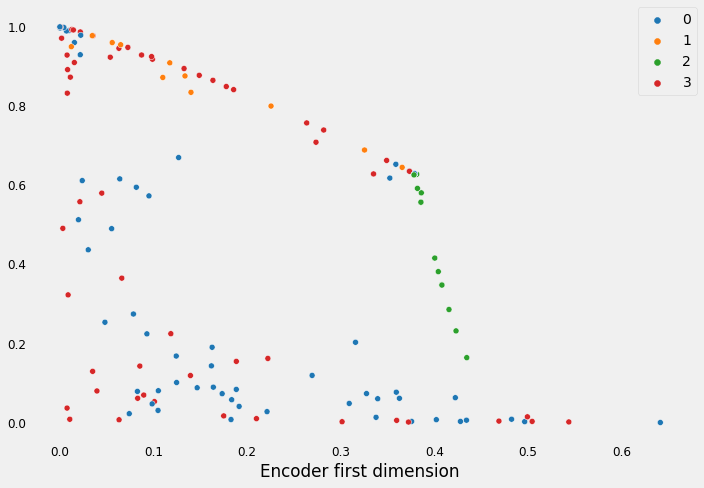

In [189]:
plt.figure(figsize=(10, 7))

sns.scatterplot(x=df_X_test_compressed[:,0],
                y=df_X_test_compressed[:,1],
#                 y=np.zeros(df_X_test_compressed.shape[0]),
                hue=df_y_test, palette='tab10')

plt.xlabel("Encoder first dimension")

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

plt.grid()
plt.tight_layout()
save_fig("ae_feature_space")